In [1]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.model_selection import train_test_split

2024-11-04 18:19:38.632047: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-04 18:19:38.639123: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 18:19:38.723138: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 18:19:38.813349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 18:19:38.903471: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
train_dataset_path = '/home/arka/Desktop/assignments/ic272/Assignment5/cifar-3class-data/train'
test_dataset_path = '/home/arka/Desktop/assignments/ic272/Assignment5/cifar-3class-data/test'

In [52]:
classes = ['aeroplane', 'car', 'bird']

In [3]:
def import_from_directory(_path):
    images = []

    for idx, lbl in enumerate(classes):
        path = os.path.join(_path, str(idx))
        for img in os.listdir(path):
            im_path = os.path.join(path, img)
            img = np.asarray(Image.open(im_path).convert('L'))
            images.append(img)
            
    images = np.array(images)
    count = images.shape[0]//3
    labels = np.array([0]*count + [1]*count + [2]*count)
    return images, labels

In [4]:
train_images, train_labels = import_from_directory(train_dataset_path)
im_train, im_cv, lbl_train, lbl_cv = train_test_split(train_images, train_labels, test_size=0.1)

In [5]:
im_train = im_train/255
im_cv = im_cv/255

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

/home/arka/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Input 0 of layer "conv2d_4" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 32, 32)

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,848,571 (22.31 MB)

 Trainable params: 1,949,523 (7.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,899,048 (14.87 MB)

In [37]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [38]:
history = model.fit(im_train, lbl_train, 
                    epochs=50, 
                    batch_size=200,
                    validation_data=(im_cv, lbl_cv))

Epoch 1/50


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - loss: 1.0729 - sparse_categorical_accuracy: 0.8343 - val_loss: 1.3958 - val_sparse_categorical_accuracy: 0.6933
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - loss: 0.2861 - sparse_categorical_accuracy: 0.9076 - val_loss: 0.9837 - val_sparse_categorical_accuracy: 0.7400
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - loss: 0.1389 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.6510 - val_sparse_categorical_accuracy: 0.7800
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - loss: 0.0922 - sparse_categorical_accuracy: 0.9777 - val_loss: 0.6138 - val_sparse_categorical_accuracy: 0.7867
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - loss: 0.0635 - sparse_categorical_accuracy: 0.9897 - val_loss: 0.6338 - val_sparse_categorical_accuracy: 0.8200
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - loss: 0.0379 - sparse_categorical_accuracy: 0.9972 - val_loss: 0.6526 - val_sparse_categorical_accuracy: 0.8267
Epoch 7/50
7/7 ━━━━━━━━━━━━

In [39]:
model.save_weights(filepath='/home/arka/Desktop/assignments/ic272/Assignment5/weights_cnn.weights.h5')

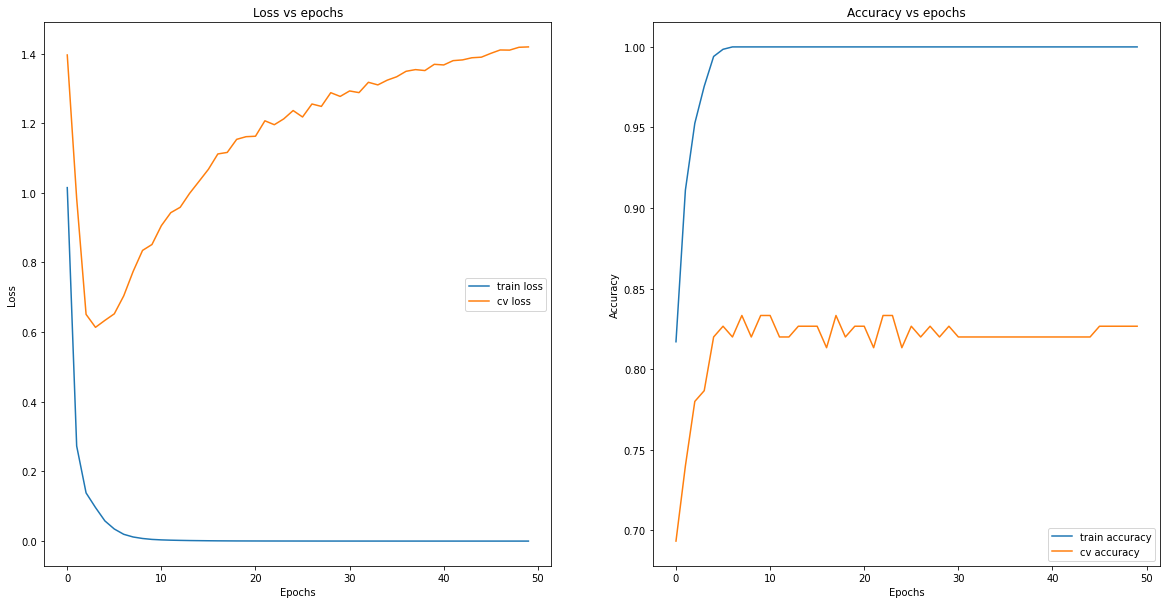

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(history.history['loss'], label='train loss')
ax[0].plot(history.history['val_loss'], label='cv loss')
ax[0].set_title('Loss vs epochs')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].legend()

ax[1].plot(history.history['sparse_categorical_accuracy'], label='train accuracy')
ax[1].plot(history.history['val_sparse_categorical_accuracy'], label='cv accuracy')
ax[1].set_title('Accuracy vs epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].legend()

plt.show()

In [41]:
test_images, test_labels = import_from_directory(test_dataset_path)

In [42]:
test_images = test_images/255

In [43]:
model.load_weights('/home/arka/Desktop/assignments/ic272/Assignment5/weights_cnn.weights.h5')

In [44]:
test_images.shape

(300, 32, 32)

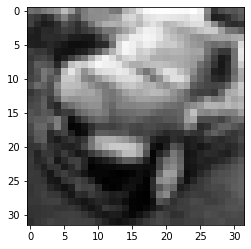

In [45]:
plt.imshow(test_images[150], cmap='gray')

In [46]:
model.predict(test_images[150].reshape(1, 32, 32))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


array([[4.3064026e-07, 9.9941039e-01, 5.8919250e-04]], dtype=float32)

In [48]:
prediction = model.predict(test_images)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [49]:
prediction.shape

(300, 3)

In [60]:
pred_classes = prediction.argmax(axis=1)

In [58]:
test_labels.shape, pred_classes.shape

((300,), (300,))

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_labels, pred_classes)
print(confusion_matrix)

[[75  8 17]
 [ 7 87  6]
 [17  4 79]]


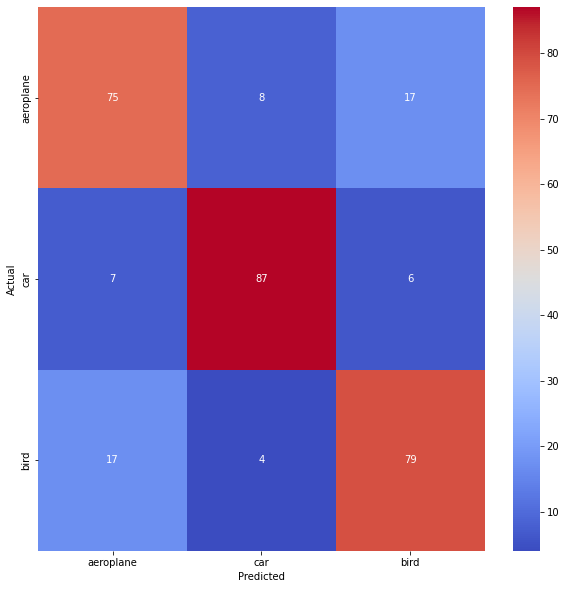

In [67]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [68]:
sum(test_labels == pred_classes)/test_labels.shape[0]

0.8033333333333333

In [70]:
loss, accuracy = model.evaluate(test_images, test_labels)
accuracy

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.8019 - sparse_categorical_accuracy: 0.7854


0.8033333420753479